In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# Data Import

Vedi dati su Kaggle https://www.kaggle.com/datasets/rohanrao/nifty50-stock-market-data?select=NIFTY50_all.csv


In [285]:
df = pd.read_csv('BPCL.csv')

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [79]:
df['Date']

0       2000-01-03
1       2000-01-04
2       2000-01-05
3       2000-01-06
4       2000-01-07
           ...    
5301    2021-04-26
5302    2021-04-27
5303    2021-04-28
5304    2021-04-29
5305    2021-04-30
Name: Date, Length: 5306, dtype: object

# DatetimeIndex

La colonna Date è riconosciuta come 'object', ma noi vogliamo che diventi l'indice del DataFrame, e in particolare che diventi un DatetimeIndex

In [206]:
df.index = pd.to_datetime(df['Date'])
df = df.sort_index()

Il DatetimeIndex ha una serie di vantaggi pratici:
- si possono ricavare i tipici attributi di una data (ora, giorno, mese etc.)
- si ordinano semplicemente con sort_index()
si può fare un 'resampling' su un diverso step temporale molto facilmente
- ...

In [10]:
df.index.dayofweek

Int64Index([0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
            ...
            4, 0, 1, 3, 4, 0, 1, 2, 3, 4],
           dtype='int64', name='Date', length=5306)

In [12]:
df.index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
           dtype='int64', name='Date', length=5306)

In [15]:
### si può anche cambiare la formattazione della data (non è importante per ora saperlo gestire)
df.index.strftime('%a-%d-%m-%y')

Index(['Mon-03-01-00', 'Tue-04-01-00', 'Wed-05-01-00', 'Thu-06-01-00',
       'Fri-07-01-00', 'Mon-10-01-00', 'Tue-11-01-00', 'Wed-12-01-00',
       'Thu-13-01-00', 'Fri-14-01-00',
       ...
       'Fri-16-04-21', 'Mon-19-04-21', 'Tue-20-04-21', 'Thu-22-04-21',
       'Fri-23-04-21', 'Mon-26-04-21', 'Tue-27-04-21', 'Wed-28-04-21',
       'Thu-29-04-21', 'Fri-30-04-21'],
      dtype='object', name='Date', length=5306)

In [20]:
## resampling ('T':minute, 'D':day,'W':week, 'M':month, 'Y':year)
df.resample('W').agg(np.mean)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,
2000-01-09,377.780,376.480000,389.380000,372.200000,384.420000,382.680000,381.422,4741.40,1.811769e+11,NaN,NaN,NaN
2000-01-16,410.450,416.600000,426.570000,409.820000,415.970000,415.310000,416.278,44901.80,1.858290e+12,NaN,NaN,NaN
2000-01-23,415.060,420.400000,428.780000,412.350000,419.380000,418.230000,419.592,29332.60,1.239302e+12,NaN,NaN,NaN
2000-01-30,462.975,476.000000,492.000000,456.500000,478.250000,476.675000,474.660,45686.50,2.163867e+12,NaN,NaN,NaN
2000-02-06,463.530,471.600000,474.000000,457.600000,458.110000,458.740000,460.112,35126.00,1.614499e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-04,2540.200,2549.716667,2576.983333,2528.166667,2551.083333,2555.733333,2554.190,1723014.00,4.402757e+14,82018.333333,587264.00,0.33470
2021-04-11,2590.650,2590.800000,2631.890000,2565.450000,2604.530000,2606.460000,2602.946,1732452.40,4.504097e+14,99680.600000,592163.40,0.33840
2021-04-18,2597.850,2588.950000,2630.762500,2559.500000,2603.112500,2606.075000,2601.310,1649631.75,4.314018e+14,86663.750000,554323.75,0.33495


In [85]:
df.loc['2012-01-10':'2012-01-15']

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2012-01-10,2012-01-10,BPCL,EQ,469.05,472.00,486.60,470.55,482.50,482.70,480.60,354887,1.705605e+13,15551.0,161133.0,0.4540
2012-01-11,2012-01-11,BPCL,EQ,482.70,486.95,509.85,485.15,508.00,507.50,499.99,770161,3.850712e+13,27331.0,382577.0,0.4967
2012-01-12,2012-01-12,BPCL,EQ,507.50,509.40,516.00,500.10,513.40,512.45,511.09,774656,3.959198e+13,13548.0,520689.0,0.6722
2012-01-13,2012-01-13,BPCL,EQ,512.45,517.40,519.00,506.10,506.55,508.65,512.00,252079,1.290637e+13,11744.0,77731.0,0.3084


# Modeling

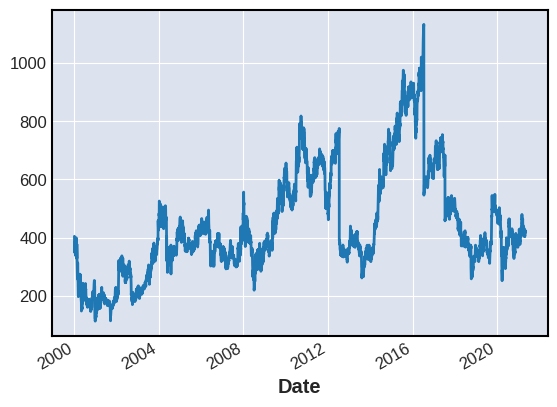

In [87]:
df['Open'].plot()
plt.show()

### Target: shifted Open

Il nostro obiettivo è quello di prevedere l'Open del giorno successivo a partire dall'Open del giorno corrente

In [106]:
df['D+1 OPEN'] = df['Open'].shift(-1).copy()

In [107]:
df.isna().sum()

Open        0
High        0
Low         0
Close       0
D+1 OPEN    1
dtype: int64

In [108]:
df = df.dropna()

### Train_test_split

Come sempre splittiamo il dataset. Ma questa volta bisogna ricordarsi di non usare Shuffle=True!

In [109]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, shuffle=False)

In [167]:
### oppure....
train_df = df.loc[:'2018-12-31'].copy()
test_df = df.loc['2019-01-01':].copy()

In [180]:
features = ['Open']
X_train = train_df[features].copy()
X_test = test_df[features].copy()

In [181]:
target_name = 'D+1 OPEN'
y_train = train_df[target_name].copy()
y_test = test_df[target_name].copy()

In [182]:
X_train

,Open
Date,
2000-01-03,405.00
2000-01-04,397.75
2000-01-05,350.00
2000-01-06,362.00
2000-01-07,369.00
...,...
2018-12-24,374.10
2018-12-26,368.80
2018-12-27,361.00


In [183]:
y_test

Date
2019-01-01    366.0
2019-01-02    352.0
2019-01-03    351.8
2019-01-04    360.0
2019-01-07    355.1
              ...  
2021-04-23    426.0
2021-04-26    417.5
2021-04-27    422.0
2021-04-28    422.0
2021-04-29    417.5
Name: D+1 OPEN, Length: 576, dtype: float64

### RandomForestRegressor

In [184]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error

model = RandomForestRegressor()
model = model.fit(X_train, y_train)

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

In [185]:
print(r2_train)
print(r2_test)

0.9972562057513387
0.9465757119292182


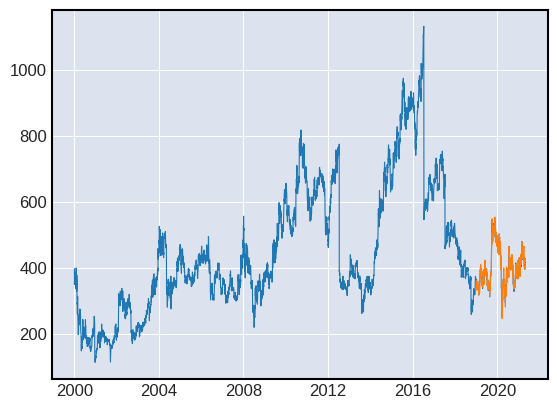

In [186]:
plt.plot(df[target_name], linewidth=0.8)
plt.plot(pd.Series(test_preds, y_test.index), linewidth=0.8),
plt.show()

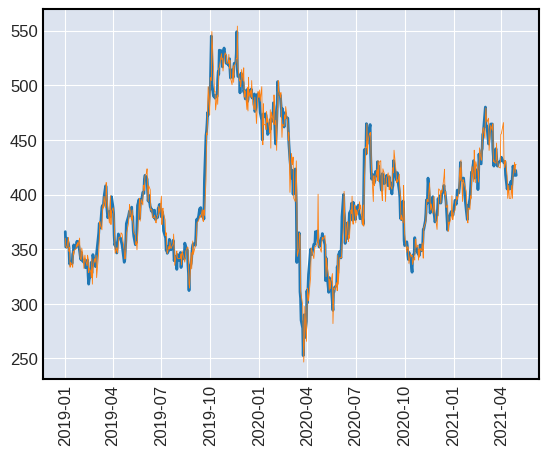

In [187]:
plt.plot(y_test)
plt.plot(pd.Series(test_preds, y_test.index), linewidth=0.6)
plt.xticks(rotation=90)
plt.show()

Sembra piuttosto buono! In realtà però quello che davvero ci interessa è la direzione del prezzo...! Cioè, mi interessa un segnale COMPRA / VENDI che possa essere eseguito all'OPEN. Vediamo come andiamo sulla direzione

In [188]:
test_df['preds'] = pd.Series(test_preds, index=y_test.index)

In [189]:
test_df['target_direction'] = np.sign(test_df['D+1 OPEN']-test_df['Open'])

In [190]:
test_df['pred_direction'] = np.sign(test_df['preds']-test_df['Open'])

In [191]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_df['target_direction'],test_df['pred_direction']))

0.4635416666666667


Malissimo!! Sarebbe quasi meglio lanciare una moneta

In [211]:
df = pd.read_csv('BPCL.csv')
df.index = pd.to_datetime(df['Date'])
df = df.sort_index()

target_name = 'D+1 OPEN'
df[target_name] = df['Open'].shift(-1)
df = df.dropna()

In [212]:
df['OPEN D-1'] = df['Open'].rolling(3).mean()
df['OPEN D-3'] = df['Open'].rolling(7).mean()
df['OPEN D-7'] = df['Open'].rolling(30).mean()

df = df.dropna()

In [213]:
train_df = df.loc[:'2018-12-31'].copy()
test_df = df.loc['2019-01-01':].copy()

In [214]:
features = ['Open','OPEN D-1','OPEN D-3','OPEN D-7']
X_train = train_df[features].copy()
X_test = test_df[features].copy()

y_train = train_df[target_name].copy()
y_test = test_df[target_name].copy()

In [215]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error

model = RandomForestRegressor()
model = model.fit(X_train, y_train)

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

print(r2_train)
print(r2_test)

test_df['preds'] = pd.Series(test_preds, index=y_test.index)
test_df['target_direction'] = np.sign(test_df['D+1 OPEN']-test_df['Open'])
test_df['pred_direction'] = np.sign(test_df['preds']-test_df['Open'])

from sklearn.metrics import accuracy_score
print(accuracy_score(test_df['target_direction'],test_df['pred_direction']))

0.9980952766257393
0.9553501857752416
0.484375


In [202]:
X_train

,Open,OPEN D-1,OPEN D-3,OPEN D-7,OPEN D-7
Date,,,,,
2000-01-21,372.50,376.0,375.0,380.00,380.00
2000-01-24,385.00,372.5,381.3,380.00,380.00
2000-01-25,350.00,385.0,376.0,378.00,378.00
2000-01-27,355.00,350.0,372.5,379.00,379.00
2000-01-28,337.35,355.0,385.0,375.00,375.00
...,...,...,...,...,...
2018-12-24,374.10,374.7,358.4,329.75,329.75
2018-12-26,368.80,374.1,357.0,334.65,334.65
2018-12-27,361.00,368.8,374.7,345.00,345.00


# PROPHET

In [262]:
## preparo i dati per Prophet (deve essere un DataFrame con colonne ['ds','y'])

df = pd.read_csv('BPCL.csv')
df.index = pd.to_datetime(df['Date'])
df = df.sort_index()

df['ds'] = df.index
df['y'] = df['Open'].copy()

train_df = df[['ds','y']].loc[:'2018-12-31'].copy()
test_df = df[['ds','y']].loc['2019-01-01':].copy()

from fbprophet import Prophet
model = Prophet(weekly_seasonality=True) # the Prophet class (model)
model.fit(train_df) # fit the model using all data

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [263]:
test_preds_df = model.predict(test_df)

In [264]:
test_preds_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,359.992542,283.777229,456.757323,359.992542,359.992542,6.240512,6.240512,6.240512,1.819934,1.819934,1.819934,4.420578,4.420578,4.420578,0.0,0.0,0.0,366.233054
1,2019-01-02,359.604597,277.329591,449.698176,359.604597,359.604597,5.466717,5.466717,5.466717,0.484435,0.484435,0.484435,4.982282,4.982282,4.982282,0.0,0.0,0.0,365.071314
2,2019-01-03,359.216651,273.634388,456.193505,359.216651,359.216651,5.564471,5.564471,5.564471,0.066398,0.066398,0.066398,5.498073,5.498073,5.498073,0.0,0.0,0.0,364.781122
3,2019-01-04,358.828705,274.324141,447.458033,358.828705,358.828705,6.003820,6.003820,6.003820,0.043875,0.043875,0.043875,5.959945,5.959945,5.959945,0.0,0.0,0.0,364.832525
4,2019-01-07,357.664868,276.814603,452.701782,357.664868,357.664868,8.310461,8.310461,8.310461,1.345292,1.345292,1.345292,6.965169,6.965169,6.965169,0.0,0.0,0.0,365.975329
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,2021-04-26,31.790527,-253.768122,374.497449,-253.410932,340.428185,19.161193,19.161193,19.161193,1.345292,1.345292,1.345292,17.815901,17.815901,17.815901,0.0,0.0,0.0,50.951720
573,2021-04-27,31.402582,-258.698182,372.623270,-254.893399,340.791506,19.137704,19.137704,19.137704,1.819934,1.819934,1.819934,17.317770,17.317770,17.317770,0.0,0.0,0.0,50.540286
574,2021-04-28,31.014636,-263.722980,375.708609,-256.375866,340.895412,17.286303,17.286303,17.286303,0.484435,0.484435,0.484435,16.801868,16.801868,16.801868,0.0,0.0,0.0,48.300939
575,2021-04-29,30.626691,-262.090607,379.404009,-257.858333,340.576305,16.350498,16.350498,16.350498,0.066398,0.066398,0.066398,16.284100,16.284100,16.284100,0.0,0.0,0.0,46.977188


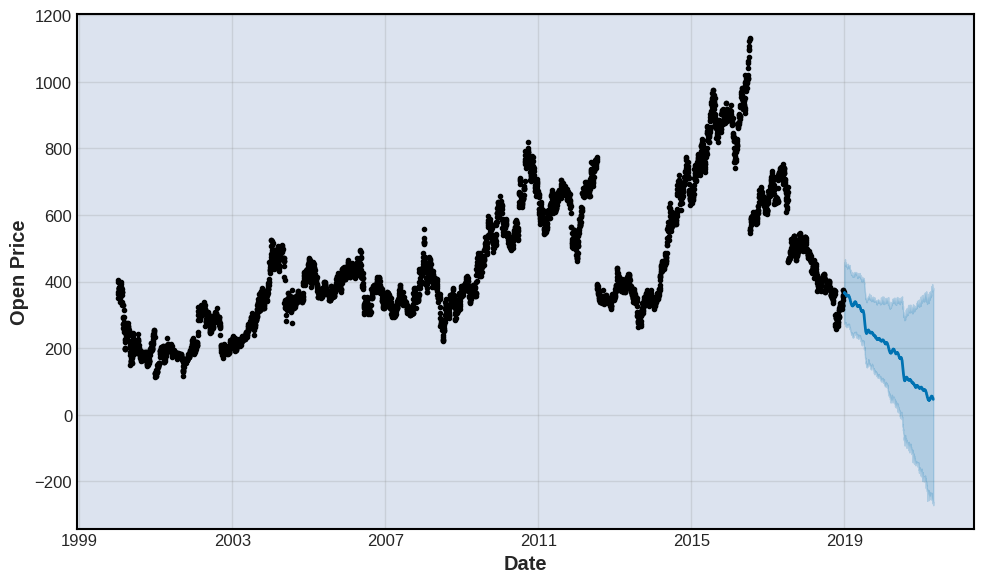

In [281]:
model.plot(test_preds_df)
plt.xlabel("Date")
plt.ylabel("Open Price")
plt.show()

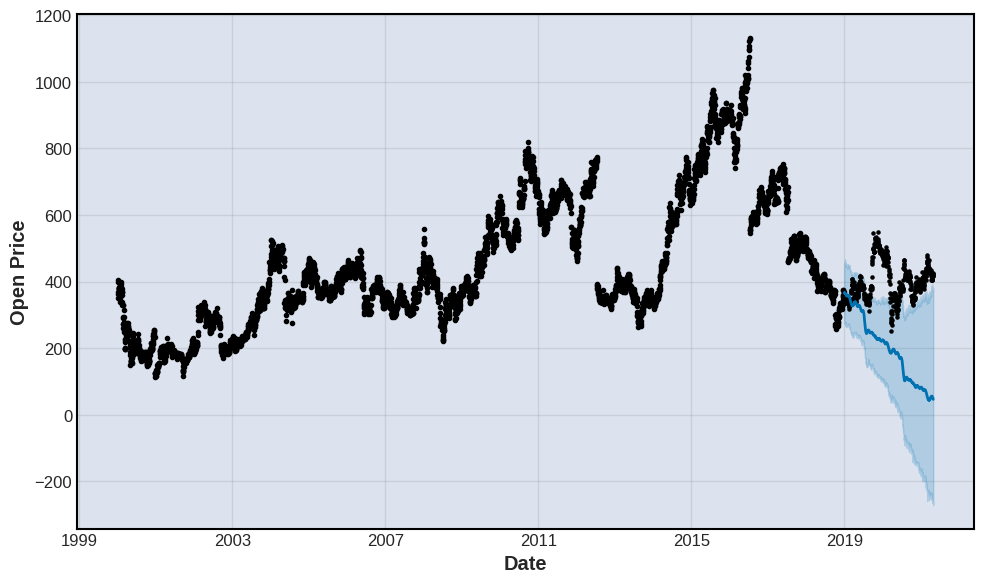

In [284]:
model.plot(test_preds_df)
plt.scatter(x=test_df.index, y=test_df['y'], s=5, c='k')

plt.xlabel("Date")
plt.ylabel("Open Price")
plt.show()